<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#输入序列、目标序列与输出序列" data-toc-modified-id="输入序列、目标序列与输出序列-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>输入序列、目标序列与输出序列</a></span></li><li><span><a href="#词嵌入与位置编码" data-toc-modified-id="词嵌入与位置编码-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>词嵌入与位置编码</a></span><ul class="toc-item"><li><span><a href="#输入序列词嵌入与位置编码" data-toc-modified-id="输入序列词嵌入与位置编码-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>输入序列词嵌入与位置编码</a></span></li><li><span><a href="#目标序列词嵌入与位置编码" data-toc-modified-id="目标序列词嵌入与位置编码-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>目标序列词嵌入与位置编码</a></span></li></ul></li><li><span><a href="#编码器Encoder" data-toc-modified-id="编码器Encoder-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>编码器Encoder</a></span><ul class="toc-item"><li><span><a href="#编码器结构" data-toc-modified-id="编码器结构-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>编码器结构</a></span></li><li><span><a href="#多头注意力机制与缩放点积" data-toc-modified-id="多头注意力机制与缩放点积-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>多头注意力机制与缩放点积</a></span></li><li><span><a href="#编码器pad掩码" data-toc-modified-id="编码器pad掩码-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>编码器pad掩码</a></span></li><li><span><a href="#前馈神经网络" data-toc-modified-id="前馈神经网络-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>前馈神经网络</a></span></li></ul></li><li><span><a href="#解码器Decoder" data-toc-modified-id="解码器Decoder-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>解码器Decoder</a></span><ul class="toc-item"><li><span><a href="#解码器结构" data-toc-modified-id="解码器结构-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>解码器结构</a></span></li><li><span><a href="#解码器pad掩码、解码器sequence掩码和编码器解码器pad掩码" data-toc-modified-id="解码器pad掩码、解码器sequence掩码和编码器解码器pad掩码-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>解码器pad掩码、解码器sequence掩码和编码器解码器pad掩码</a></span></li></ul></li><li><span><a href="#代码实现" data-toc-modified-id="代码实现-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>代码实现</a></span><ul class="toc-item"><li><span><a href="#数据处理" data-toc-modified-id="数据处理-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>数据处理</a></span></li><li><span><a href="#Transformer定义" data-toc-modified-id="Transformer定义-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Transformer定义</a></span></li><li><span><a href="#编码器定义" data-toc-modified-id="编码器定义-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>编码器定义</a></span></li><li><span><a href="#解码器定义" data-toc-modified-id="解码器定义-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>解码器定义</a></span></li><li><span><a href="#缩放点积多头注意力机制与前馈神经网络" data-toc-modified-id="缩放点积多头注意力机制与前馈神经网络-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>缩放点积多头注意力机制与前馈神经网络</a></span></li><li><span><a href="#掩码与位置编码" data-toc-modified-id="掩码与位置编码-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>掩码与位置编码</a></span></li><li><span><a href="#模型训练与验证" data-toc-modified-id="模型训练与验证-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>模型训练与验证</a></span></li></ul></li></ul></div>

# Transformer通用特征提取器

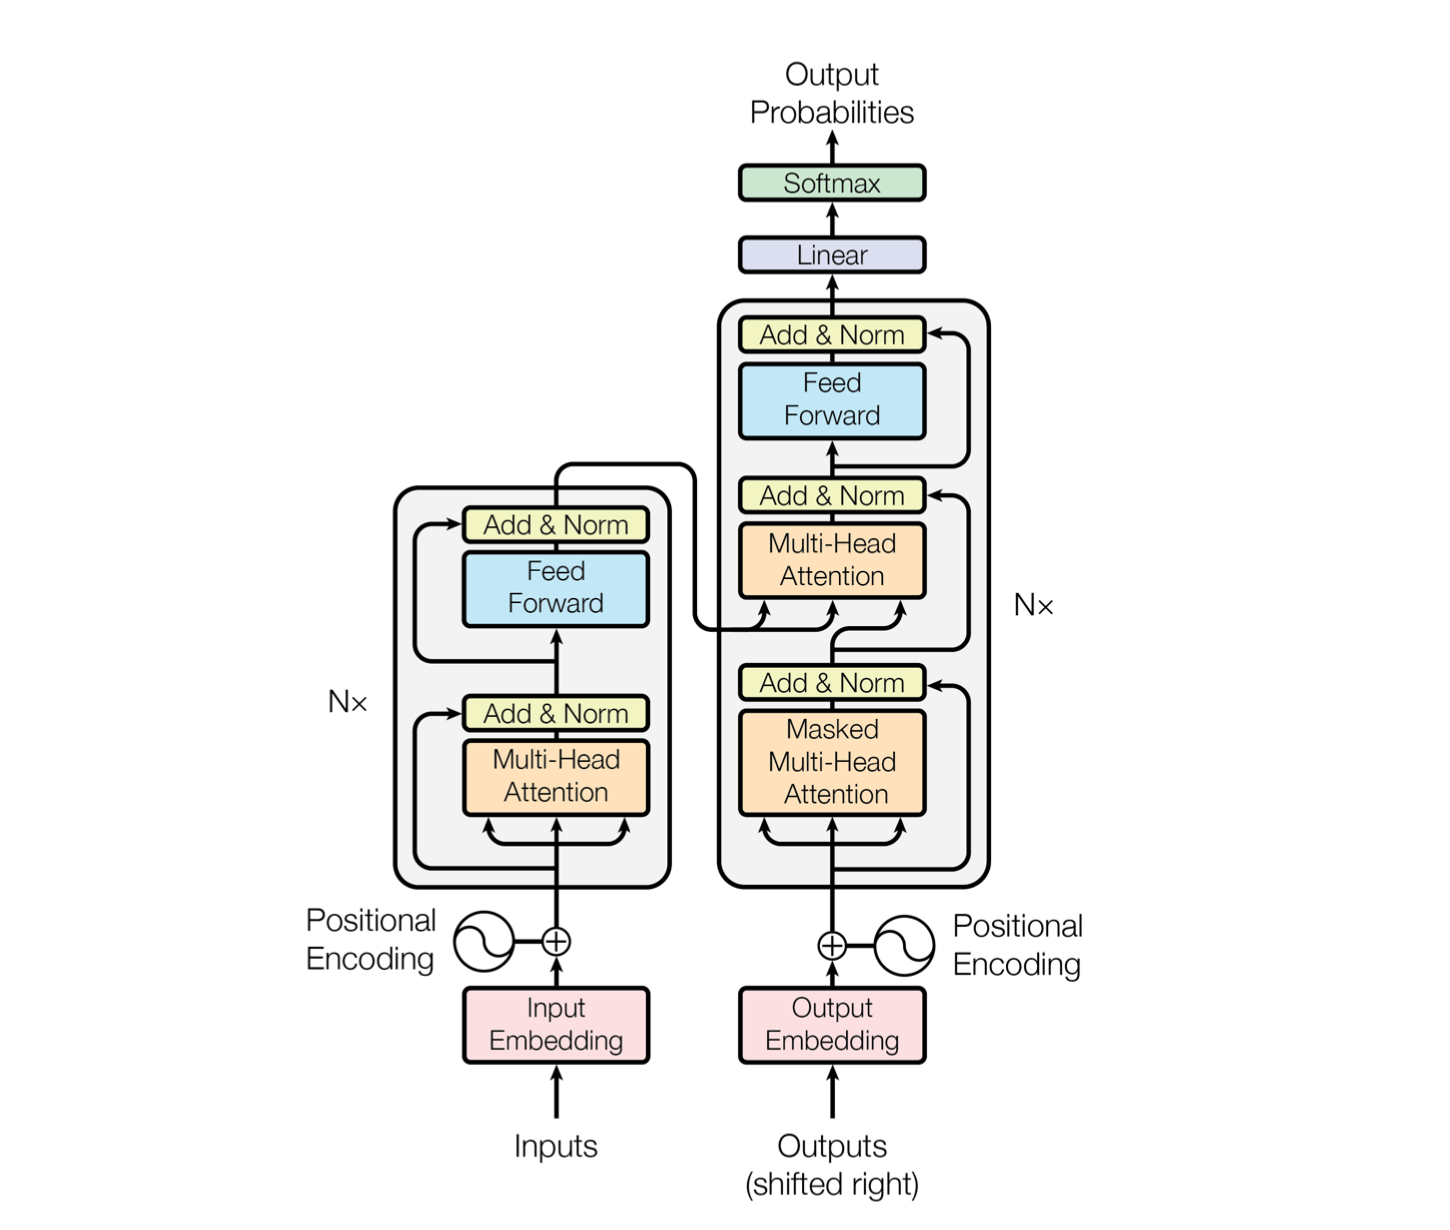

## 输入序列、目标序列与输出序列

输入序列$inputs=\left(i_1,i_2,\cdots,i_p,\cdots,i_N\right)$，其中$i_p\in\mathbb{N^*}$为输入符号表中的序号。  
目标序列$targets=\left(t_1,t_2,\cdots,t_q,\cdots,t_M\right)$，其中$t_q\in\mathbb{N^*}$为目标符号表中的序号。

$$outputs\_probabilities=Transformer\left(inputs,targets\right)$$
其中，$outputs\_probabilities=\left(o_1,o_2,\cdots,o_q,\cdots,o_M\right)$为预测序列，$o_q\in\mathbb{N^*}$为目标符号表中的序号。

在自然语言处理任务中，当输入序列与目标序列中的元素较多，通常以句子为单位划分为若干个对应的“输入-目标”子序列进行学习。

## 词嵌入与位置编码

### 输入序列词嵌入与位置编码

输入序列词嵌入$Embedding\left(inputs\right)\in\mathbb{R}^{N\times d_{model}}$，其中，$N$为输入序列长度，$d_{model}$为词嵌入维度。

输入序列位置编码$Pos\_Enc\left(inputs\_position\right)\in\mathbb{R}^{N\times d_{model}}$，  
其中，$inputs\_position=\left(1,2,\cdots,p,\cdots,N\right)$为输入序列中输入符号对应的位置序号；  
$$\begin{align}
Pos\_Enc_{\left(pos,2i\right)}&=\sin\left(pos/10000^{2i/d_{model}}\right)  \\
Pos\_Enc_{\left(pos,2i+1\right)}&=\cos\left(pos/10000^{2i/d_{model}}\right)
\end{align}$$
其中，$pos\in inputs\_position,i\in\left(0,1,\cdots,d_{model}/2\right)$。

### 目标序列词嵌入与位置编码

目标序列词嵌入$Embedding\left(targets\right)\in\mathbb{R}^{M\times d_{model}}$，其中$M$为目标序列长度，$d_{model}$为词嵌入维度。

目标序列位置编码$Pos\_Enc\left(targets\_position\right)\in\mathbb{R}^{M\times d_{model}}$，  
其中，$targets\_position=\left(1,2,\cdots,q,\cdots,M\right)$为目标序列的位置序号。

## 编码器Encoder

### 编码器结构

编码器结构：
$$\begin{align}
e_0&=Embedding\left(inputs\right)+Pos\_Enc\left(inputs\_position\right) \\
e_l&=EncoderLayer\left(e_{l-1}\right),l\in\left[1,n\right] \\
\end{align}$$
其中，$e_0\in\mathbb{R}^{N\times d_{model}}$为编码器输入，$EncoderLayer\left(\cdot\right)$为编码器层，$n$为层数，$e_l\in\mathbb{R}^{N\times d_{model}}$为第$l$层编码器层输出。

编码器层EncoderLayer：
$$\begin{align}
e_{mid}&=LayerNorm\left(e_{in}+MultiHeadAttention\left(e_{in}\right)\right) \\
e_{out}&=LayerNorm\left(e_{mid}+FFN\left(e_{mid}\right)\right)
\end{align}$$
其中，$e_{in}\in\mathbb{R}^{N\times d_{model}}$为编码器层输入，$e_{out}\in\mathbb{R}^{N\times d_{model}}$为编码器层输出，$MultiHeadAttention\left(\cdot\right)$为多头注意力机制，$FFN\left(\cdot\right)$为前馈神经网络，$LayerNorm\left(\cdot\right)$为层归一化。

### 多头注意力机制与缩放点积

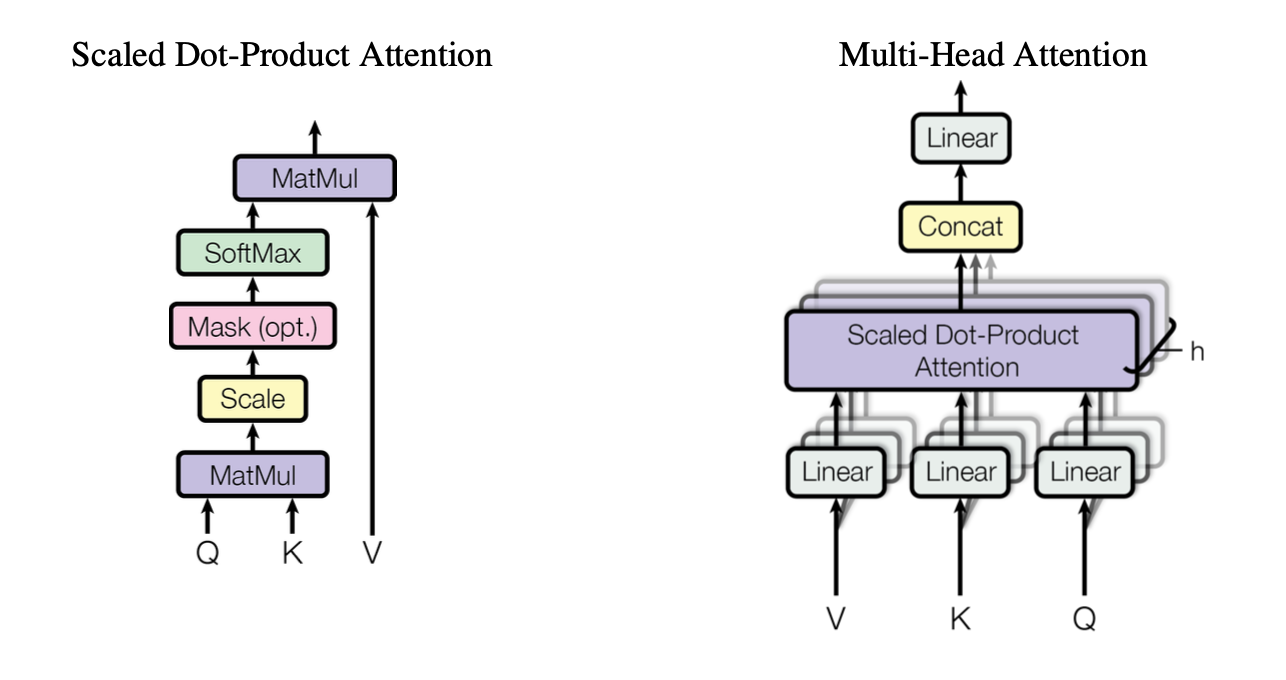

输入向量序列$e_{in}=\left(e_{in1},e_{in2},\cdots,e_{inN}\right)\in\mathbb{R}^{N\times d_{model}}$，分别得到查询向量序列$Q=e_{in}$，键向量序列$K=e_{in}$，值向量序列$V=e_{in}$。

多头注意力机制
$$MultiHeadAttention\left(e_{in}\right)=MultiHead\left(Q,K,V\right)=Concat\left(head_1,\cdots,head_h\right)W^O$$
其中，多头输出$head_i=Attention\left(QW_i^Q,KW_i^K,VW_i^V\right)$，可学习的参数矩阵$W_i^Q\in\mathbb{R}^{d_{model}\times d_k},W_i^K\in\mathbb{R}^{d_{model}\times d_k},W_i^V\in\mathbb{R}^{d_{model}\times d_v},W^O\in\mathbb{R}^{hd_v\times d_{model}}$

使用缩放点积作为打分函数的自注意力机制
$$Attention\left(QW_i^Q,KW_i^K,VW_i^V\right)=softmax\left(\frac{QW_i^Q\left(KW_i^K\right)^\top}{\sqrt{d_k}}\right)VW_i^V$$

### 编码器pad掩码   
$$enc\_pad\_mask_j=\left(e_{j1},e_{j2},\cdots,e_{jp},\cdots,e_{jN}\right)$$
其中，
$$
e_{jp}=\left\{
\begin{array}{rcl}
True,      &      & {i_p=0}\\
False,     &      & {i_p \neq 0}
\end{array} \right.   \quad j=1,2,\cdots,N
$$
$enc\_pad\_mask\in\mathbb{R}^{N\times N}$，$i_p$为输入序列$inputs$对应位置序号。

### 前馈神经网络

$$\begin{align}
FFN\left(e_{mid}\right)&=ReLU\left(e_{mid}W_1+b_1\right)W_2+b_2 \\
&=\max\left(0,e_{mid}W_1+b_1\right)W_2+b_2
\end{align}$$

其中，参数矩阵$W_1\in\mathbb{R}^{d_{model}\times d_{ff}},W_2\in\mathbb{R}^{d_{ff}\times d_{model}}$，偏置$b_1\in\mathbb{R}^{d_{ff}},b_2\in\mathbb{R}^{d_{model}}$。

## 解码器Decoder

### 解码器结构

$$\begin{align}
d_0&=Embedding\left(targets\right)+Pos\_Enc\left(targets\_position\right)  \\
d_l&=DecoderLayer\left(d_{l-1}\right),l\in\left[1,n\right] \\
outputs\_probabilities&=softmax\left(d_{n}W\right)
\end{align}$$
其中，$d_0\in\mathbb{R}^{M\times d_{model}}$为解码器输入，$DecoderLayer\left(\cdot\right)$为解码器层，$n$为层数，$d_l\in\mathbb{R}^{M\times d_{model}}$为第$l$层解码器层输出，$W\in\mathbb{R}^{M\times tgt\_vocab\_size}$输入输出参数矩阵，$softmax\left(\cdot\right)$为softmax层。

解码器层DecoderLayer：
$$\begin{align}
d_{mid1}&=LayerNorm\left(d_{in}+MaskedMultiHeadAttention\left(d_{in}\right)\right) \\
d_{mid2}&=LayerNorm\left(d_{mid1}+MultiHeadAttention\left(d_{mid1},e_{out}\right)\right) \\
d_{out}&=LayerNorm\left(d_{mid2}+FFN\left(d_{mid2}\right)\right)
\end{align}$$
其中，$d_{in}\in\mathbb{R}^{M\times d_{model}}$为解码器层输入，$d_{out}\in\mathbb{R}^{M\times d_{model}}$为解码器层输出，$MultiHeadAttention\left(\cdot\right)$为多头注意力机制，$FFN\left(\cdot\right)$为前馈神经网络，$LayerNorm\left(\cdot\right)$为层归一化。

### 解码器pad掩码、解码器sequence掩码和编码器解码器pad掩码

解码器pad掩码
$$dec\_pad\_mask_j=\left(d_{j1},d_{j2},\cdots,d_{jq},\cdots,d_{jM}\right)$$
其中，
$$
d_{jq}=\left\{
\begin{array}{rcl}
True,      &      & {t_q=0}\\
False,     &      & {t_q \neq 0}
\end{array} \right.   \quad j=1,2,\cdots,M
$$
$dec\_pad\_mask\in\mathbb{R}^{M\times M}$，$t_q$为目标序列$targets$对应位置序号。

解码器sequence掩码
$$dec\_sequence\_mask_j=\left(s_{j1},s_{j2},\cdots,s_{jl},\cdots,s_{jM}\right)$$
其中，
$$
s_{jl}=\left\{
\begin{array}{rcl}
0,      &      & {j\geq l}\\
1,     &      & {j < l}
\end{array} \right.   \quad j=1,2,\cdots,M
$$
$dec\_sequence\_mask\in\mathbb{R}^{M\times M}$，为非零元素为1的上三角矩阵。

解码器掩码
$$dec\_mask=dec\_pad\_mask+dec\_sequence\_mask$$

编码器解码器pad掩码
$$dec\_enc\_pad\_mask_j=\left(de_{j1},de_{j2},\cdots,de_{jp},\cdots,de_{jN}\right)$$
其中，
$$
de_{jp}=\left\{
\begin{array}{rcl}
True,      &      & {i_p=0}\\
False,     &      & {i_p \neq 0}
\end{array} \right.   \quad j=1,2,\cdots,M
$$
$dec\_enc\_pad\_mask\in\mathbb{R}^{M\times N}$，$i_p$为输入序列$inputs$对应位置序号。

## 代码实现

### 数据处理

In [3]:
import numpy as np 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt 

dtype = torch.FloatTensor

sentences = ['ich mochte ein bier P', 'S i want a beer', 'i want a beer E']
src_vocab = {'P' : 0, 'ich' : 1, 'mochte' : 2, 'ein' : 3, 'bier' : 4}
src_vocab_size = len(src_vocab)

tgt_vocab = {'P' : 0, 'i' : 1, 'want' : 2, 'a' : 3, 'beer' : 4, 'S' : 5, 'E' : 6}
number_dict = {i: w for i, w in enumerate(tgt_vocab)}
tgt_vocab_size = len(tgt_vocab)

src_len = 5
tgt_len = 5

d_model = 512  
d_ff = 2048 
d_k = d_v = 64  
n_layers = 6  
n_heads = 8  

def make_batch(sentences):
    input_batch = [[src_vocab[w] for w in sentences[0].split()]]
    output_batch = [[tgt_vocab[w] for w in sentences[1].split()]]
    target_batch = [[tgt_vocab[w] for w in sentences[2].split()]]
    return Variable(torch.LongTensor(input_batch)), Variable(torch.LongTensor(output_batch)), Variable(torch.LongTensor(target_batch))


In [4]:
make_batch(sentences)

(tensor([[1, 2, 3, 4, 0]]),
 tensor([[5, 1, 2, 3, 4]]),
 tensor([[1, 2, 3, 4, 6]]))

### Transformer定义

In [5]:
class Transformer(nn.Module):
    def __init__(self):
        super(Transformer, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
        self.projection = nn.Linear(d_model, tgt_vocab_size, bias=False)
    def forward(self, enc_inputs, dec_inputs):
        enc_outputs, enc_self_attns = self.encoder(enc_inputs)
        dec_outputs, dec_self_attns, dec_enc_attns = self.decoder(dec_inputs, enc_inputs, enc_outputs)
        dec_logits = self.projection(dec_outputs) # dec_logits : [batch_size x src_vocab_size x tgt_vocab_size]
        return dec_logits.view(-1, dec_logits.size(-1)), enc_self_attns, dec_self_attns, dec_enc_attns
    

### 编码器定义

In [6]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.src_emb = nn.Embedding(src_vocab_size, d_model)
        self.pos_emb = nn.Embedding.from_pretrained(get_sinusoid_encoding_table(src_len+1, d_model),freeze=True)
        self.layers = nn.ModuleList([EncoderLayer() for _ in range(n_layers)])

    def forward(self, enc_inputs): # enc_inputs : [batch_size x source_len]
        enc_outputs = self.src_emb(enc_inputs) + self.pos_emb(torch.LongTensor([[1,2,3,4,0]]))
        enc_self_attn_mask = get_attn_pad_mask(enc_inputs, enc_inputs)
        enc_self_attns = []
        for layer in self.layers:
            enc_outputs, enc_self_attn = layer(enc_outputs, enc_self_attn_mask)
            enc_self_attns.append(enc_self_attn)
        return enc_outputs, enc_self_attns
    
class EncoderLayer(nn.Module):
    def __init__(self):
        super(EncoderLayer, self).__init__()
        self.enc_self_attn = MultiHeadAttention()
        self.pos_ffn = PoswiseFeedForwardNet()

    def forward(self, enc_inputs, enc_self_attn_mask):
        enc_outputs, attn = self.enc_self_attn(enc_inputs, enc_inputs, enc_inputs, enc_self_attn_mask) # enc_inputs to same Q,K,V
        enc_outputs = self.pos_ffn(enc_outputs) # enc_outputs: [batch_size x len_q x d_model]
        return enc_outputs, attn
    

### 解码器定义

In [7]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.tgt_emb = nn.Embedding(tgt_vocab_size, d_model)
        self.pos_emb = nn.Embedding.from_pretrained(get_sinusoid_encoding_table(tgt_len+1, d_model),freeze=True)
        self.layers = nn.ModuleList([DecoderLayer() for _ in range(n_layers)])

    def forward(self, dec_inputs, enc_inputs, enc_outputs): # dec_inputs : [batch_size x target_len]
        dec_outputs = self.tgt_emb(dec_inputs) + self.pos_emb(torch.LongTensor([[5,1,2,3,4]]))
        dec_self_attn_pad_mask = get_attn_pad_mask(dec_inputs, dec_inputs)
        dec_self_attn_subsequent_mask = get_attn_subsequent_mask(dec_inputs)
        dec_self_attn_mask = torch.gt((dec_self_attn_pad_mask + dec_self_attn_subsequent_mask), 0)

        dec_enc_attn_mask = get_attn_pad_mask(dec_inputs, enc_inputs)

        dec_self_attns, dec_enc_attns = [], []
        for layer in self.layers:
            dec_outputs, dec_self_attn, dec_enc_attn = layer(dec_outputs, enc_outputs, dec_self_attn_mask, dec_enc_attn_mask)
            dec_self_attns.append(dec_self_attn)
            dec_enc_attns.append(dec_enc_attn)
        return dec_outputs, dec_self_attns, dec_enc_attns

class DecoderLayer(nn.Module):
    def __init__(self):
        super(DecoderLayer, self).__init__()
        self.dec_self_attn = MultiHeadAttention()
        self.dec_enc_attn = MultiHeadAttention()
        self.pos_ffn = PoswiseFeedForwardNet()

    def forward(self, dec_inputs, enc_outputs, dec_self_attn_mask, dec_enc_attn_mask):
        dec_outputs, dec_self_attn = self.dec_self_attn(dec_inputs, dec_inputs, dec_inputs, dec_self_attn_mask)
        dec_outputs, dec_enc_attn = self.dec_enc_attn(dec_outputs, enc_outputs, enc_outputs, dec_enc_attn_mask)
        dec_outputs = self.pos_ffn(dec_outputs)
        return dec_outputs, dec_self_attn, dec_enc_attn
    

### 缩放点积多头注意力机制与前馈神经网络

In [8]:
class MultiHeadAttention(nn.Module):
    def __init__(self):
        super(MultiHeadAttention, self).__init__()
        self.W_Q = nn.Linear(d_model, d_k * n_heads)
        self.W_K = nn.Linear(d_model, d_k * n_heads)
        self.W_V = nn.Linear(d_model, d_v * n_heads)
        
    def forward(self, Q, K, V, attn_mask):
        # q: [batch_size x len_q x d_model], k: [batch_size x len_k x d_model], v: [batch_size x len_k x d_model]
        residual, batch_size = Q, Q.size(0)
        # (B, S, D) -proj-> (B, S, D) -split-> (B, S, H, W) -trans-> (B, H, S, W)
        q_s = self.W_Q(Q).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # q_s: [batch_size x n_heads x len_q x d_k]
        k_s = self.W_K(K).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # k_s: [batch_size x n_heads x len_k x d_k]
        v_s = self.W_V(V).view(batch_size, -1, n_heads, d_v).transpose(1,2)  # v_s: [batch_size x n_heads x len_k x d_v]

        attn_mask = attn_mask.unsqueeze(1).repeat(1, n_heads, 1, 1) # attn_mask : [batch_size x n_heads x len_q x len_k]

        # context: [batch_size x n_heads x len_q x d_v], attn: [batch_size x n_heads x len_q(=len_k) x len_k(=len_q)]
        context, attn = ScaledDotProductAttention()(q_s, k_s, v_s, attn_mask)
        context = context.transpose(1, 2).contiguous().view(batch_size, -1, n_heads * d_v) # context: [batch_size x len_q x n_heads * d_v]
        output = nn.Linear(n_heads * d_v, d_model)(context)
        return nn.LayerNorm(d_model)(output + residual), attn # output: [batch_size x len_q x d_model]
    
class ScaledDotProductAttention(nn.Module):
    def __init__(self):
        super(ScaledDotProductAttention, self).__init__()

    def forward(self, Q, K, V, attn_mask):
        scores = torch.matmul(Q, K.transpose(-1, -2)) / np.sqrt(d_k) # scores : [batch_size x n_heads x len_q(=len_k) x len_k(=len_q)]
        scores.masked_fill_(attn_mask, -1e9) # Fills elements of self tensor with value where mask is one.
        attn = nn.Softmax(dim=-1)(scores)
        context = torch.matmul(attn, V)
        return context, attn

class PoswiseFeedForwardNet(nn.Module):
    def __init__(self):
        super(PoswiseFeedForwardNet, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)

    def forward(self, inputs):
        residual = inputs # inputs : [batch_size, len_q, d_model]
        output = nn.ReLU()(self.conv1(inputs.transpose(1, 2)))
        output = self.conv2(output).transpose(1, 2)
        return nn.LayerNorm(d_model)(output + residual)
    

### 掩码与位置编码

In [9]:
def get_sinusoid_encoding_table(n_position, d_model):
    def cal_angle(position, hid_idx):
        return position / np.power(10000, 2 * (hid_idx // 2) / d_model)
    def get_posi_angle_vec(position):
        return [cal_angle(position, hid_j) for hid_j in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(n_position)])
    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])  # dim 2i
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])  # dim 2i+1
    return torch.FloatTensor(sinusoid_table)

def get_attn_pad_mask(seq_q, seq_k):
    batch_size, len_q = seq_q.size()
    batch_size, len_k = seq_k.size()
    # eq(zero) is PAD token
    pad_attn_mask = seq_k.data.eq(0).unsqueeze(1)  # batch_size x 1 x len_k(=len_q), one is masking
    return pad_attn_mask.expand(batch_size, len_q, len_k)  # batch_size x len_q x len_k

def get_attn_subsequent_mask(seq):
    attn_shape = [seq.size(0), seq.size(1), seq.size(1)]
    subsequent_mask = np.triu(np.ones(attn_shape), k=1)
    subsequent_mask = torch.from_numpy(subsequent_mask).byte()
    return subsequent_mask


### 模型训练与验证

In [10]:
model = Transformer()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(20):
    optimizer.zero_grad()
    enc_inputs, dec_inputs, target_batch = make_batch(sentences)
    outputs, enc_self_attns, dec_self_attns, dec_enc_attns = model(enc_inputs, dec_inputs)
    loss = criterion(outputs, target_batch.contiguous().view(-1))
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))
    loss.backward()
    optimizer.step()
    

Epoch: 0001 cost = 1.946148
Epoch: 0002 cost = 0.061065
Epoch: 0003 cost = 0.061755
Epoch: 0004 cost = 0.040034
Epoch: 0005 cost = 0.030705
Epoch: 0006 cost = 0.001976
Epoch: 0007 cost = 0.001366
Epoch: 0008 cost = 0.001905
Epoch: 0009 cost = 0.003293
Epoch: 0010 cost = 0.004082
Epoch: 0011 cost = 0.000338
Epoch: 0012 cost = 0.002591
Epoch: 0013 cost = 0.005281
Epoch: 0014 cost = 0.000948
Epoch: 0015 cost = 0.000256
Epoch: 0016 cost = 0.000409
Epoch: 0017 cost = 0.000859
Epoch: 0018 cost = 0.024325
Epoch: 0019 cost = 0.007099
Epoch: 0020 cost = 0.020045


ich mochte ein bier P -> ['i', 'want', 'a', 'beer', 'E']
first head of last state enc_self_attns


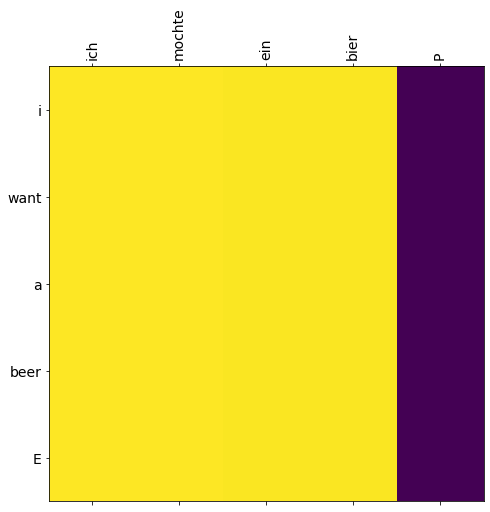

first head of last state dec_self_attns


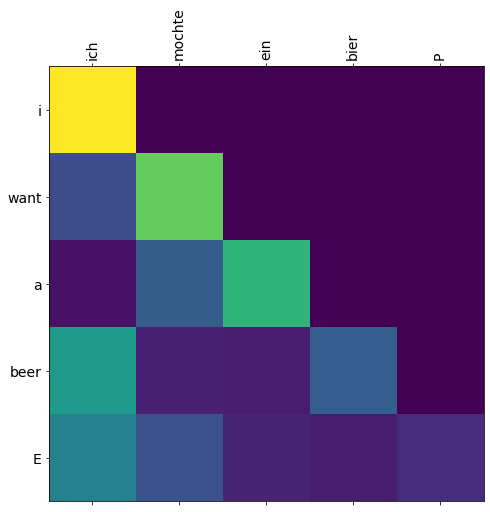

first head of last state dec_enc_attns


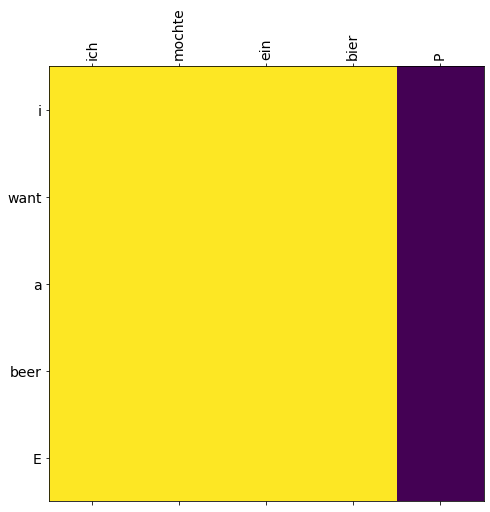

In [11]:
def showgraph(attn):
    attn = attn[-1].squeeze(0)[0]
    attn = attn.squeeze(0).data.numpy()
    fig = plt.figure(figsize=(n_heads, n_heads)) # [n_heads, n_heads]
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attn, cmap='viridis')
    ax.set_xticklabels(['']+sentences[0].split(), fontdict={'fontsize': 14}, rotation=90)
    ax.set_yticklabels(['']+sentences[2].split(), fontdict={'fontsize': 14})
    plt.show()

predict, _, _, _ = model(enc_inputs, dec_inputs)

predict = predict.data.max(1, keepdim=True)[1]
print(sentences[0], '->', [number_dict[n.item()] for n in predict.squeeze()])

print('first head of last state enc_self_attns')
showgraph(enc_self_attns)

print('first head of last state dec_self_attns')
showgraph(dec_self_attns)

print('first head of last state dec_enc_attns')
showgraph(dec_enc_attns)
